# Quantium Intership

<h3><b>Imports</b></h3>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno
import seaborn as sns

import datetime
from matplotlib.dates import DateFormatter

<h3><b>Load Data</b></h3>

In [2]:
trans_df = pd.read_excel("QVI_transaction_data.xlsx")
cust_df = pd.read_csv("QVI_purchase_behaviour.csv")

<h3><b>Transation Data</b></h3>

In [3]:
trans_df.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [4]:
cust_df.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [5]:
#shape of the data
trans_df.shape

(264836, 8)

In [6]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
trans_df.duplicated().sum() #Finding total duplicated rows

1

In [8]:
Trans_df = trans_df.drop_duplicates() #Droping the duplicated rows

In [9]:
Trans_df.duplicated().sum() #After removing duplicates

0

In [10]:
Trans_df.shape

(264835, 8)

In [11]:
Trans_df['TXN_ID'].nunique() #Number of unique TXN_IDs 

#(here they are less than total rows so people brought multiple products in same transaction)

263127

In [12]:
Trans_df[Trans_df.duplicated(['TXN_ID'])].head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
42,43605,55,55073,48887,113,Twisties Chicken270g,1,4.6
377,43475,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4
419,43391,12,12301,10982,93,Doritos Corn Chip Southern Chicken 150g,2,7.8
476,43351,16,16427,14546,81,Pringles Original Crisps 134g,1,3.7
511,43315,19,19272,16683,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6


In [13]:
Trans_df.loc[Trans_df['TXN_ID'] == 7739, :] #Example for repeated transaction id

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
376,43475,7,7364,7739,50,Tostitos Lightly Salted 175g,2,8.8
377,43475,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4


In [14]:
#Finding number of null values
Trans_df.isnull().sum()

#there are no null values in this data

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [15]:
import xlrd
def convert(xl_date):
    datetime_date = xlrd.xldate_as_datetime(xl_date, 0)
    date_object = datetime_date.date()
    string_date = date_object.isoformat()
    return string_date

Trans_df['DATE'] = Trans_df['DATE'].apply(convert)

C:\Users\Dell\AppData\Local\Temp\ipykernel_4932\274444371.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trans_df['DATE'] = Trans_df['DATE'].apply(convert)


In [16]:
Trans_df.head(10) #Date changed to string date format

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [17]:
#Getting size of chips packet from Product Name
import re
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return int(" ".join(num))

Trans_df.loc[:,'PROD_SIZE'] = Trans_df.loc[:,'PROD_NAME'].apply(find_number)

C:\Users\Dell\AppData\Local\Temp\ipykernel_4932\2427881534.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trans_df.loc[:,'PROD_SIZE'] = Trans_df.loc[:,'PROD_NAME'].apply(find_number)


In [18]:
Trans_df.head() #After creating product size column

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [19]:
def clean_text(text):
    text = re.sub("[&/]", ' ', text) #removes special characters
    text = re.sub("\d\w*", ' ', text) #removes digits and non-word characters
    return text

print(clean_text('Kettle 135g Swt Pot Sea Salt'))
    

Kettle   Swt Pot Sea Salt


In [20]:
Trans_df['PROD_NAME'] = Trans_df['PROD_NAME'].apply(clean_text) 

C:\Users\Dell\AppData\Local\Temp\ipykernel_4932\1919548674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trans_df['PROD_NAME'] = Trans_df['PROD_NAME'].apply(clean_text)


In [21]:
Trans_df.head() #After cleaning the product name

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150


In [22]:
freq = pd.Series(' '.join(Trans_df.PROD_NAME).split()).value_counts() #word frequency
freq[:5] # top 5 word according to their frequency

Chips     49770
Kettle    41288
Smiths    28859
Salt      27976
Cheese    27890
dtype: int64

In [23]:
# Removing Salsa products
print(Trans_df.shape) #before removing salsa
Trans_df['PROD_NAME'] = Trans_df['PROD_NAME'].apply(lambda x: x.lower())
Trans_df = Trans_df[~Trans_df['PROD_NAME'].str.contains("salsa")]
Trans_df['PROD_NAME'] = Trans_df['PROD_NAME'].apply(lambda x: x.title())

(264835, 9)


C:\Users\Dell\AppData\Local\Temp\ipykernel_4932\1290672457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trans_df['PROD_NAME'] = Trans_df['PROD_NAME'].apply(lambda x: x.lower())


In [24]:
Trans_df.shape #After removing salsa

(246741, 9)

E:\anaconda\envs\Quantium\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PROD_QTY'>

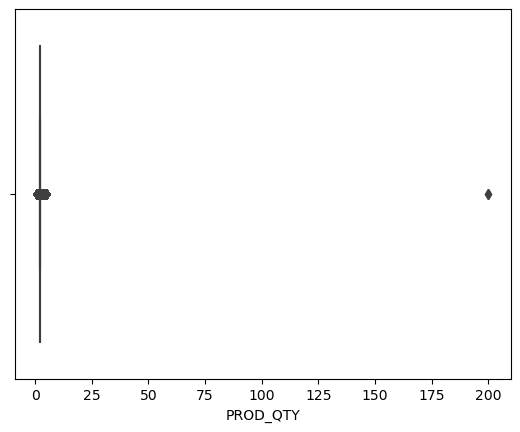

In [25]:
sns.boxplot(Trans_df['PROD_QTY']) #Looking for outliers

In [26]:
Trans_df["PROD_QTY"].value_counts()

2      220069
1       25476
5         415
3         408
4         371
200         2
Name: PROD_QTY, dtype: int64

In [27]:
Trans_df.loc[Trans_df["PROD_QTY"] == 200, :] #Analyzing Outling PROD_QTY

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


Let's see if the customer has had other transactions

In [28]:
Trans_df.loc[Trans_df["LYLTY_CARD_NBR"] == 226000, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [29]:
#Removing customer and this transaction as it customer doesn't have any other trasaction and this is outlier
Trans_df.drop(Trans_df.index[Trans_df["PROD_QTY"] == 200], inplace = True)
cust_df.drop(cust_df.index[cust_df["LYLTY_CARD_NBR"] == 226000], inplace = True)

In [30]:
Trans_df["PROD_QTY"].value_counts() #re-examining data

2    220069
1     25476
5       415
3       408
4       371
Name: PROD_QTY, dtype: int64

<h3><b>Dates</b></h3>

In [31]:
# Counting the number unique dates
Trans_df['DATE'].nunique()

#this means there is a missing date

364

In [32]:
#looking for missing date
pd.date_range(start='2018-07-01', end='2019-06-30').difference(Trans_df['DATE'])

#12-25 means it was christmas, most stores are closed on christmas

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [33]:
Trans_df["DATE"]  = pd.to_datetime(Trans_df["DATE"])
date_count = pd.pivot_table(Trans_df, values='TOT_SALES', index = 'DATE', aggfunc = 'count')
date_count.columns = ['COUNT']
date_count.head()
#number of transacation done on a date

,COUNT
DATE,
2018-07-01,663
2018-07-02,650
2018-07-03,674
2018-07-04,669
2018-07-05,660


In [34]:
new = pd.DataFrame(index = pd.date_range(start= '2018-07-01', end='2019-06-30').date)
new['COUNT'] = 0
date_count = new + date_count
date_count.fillna(0, inplace= True)

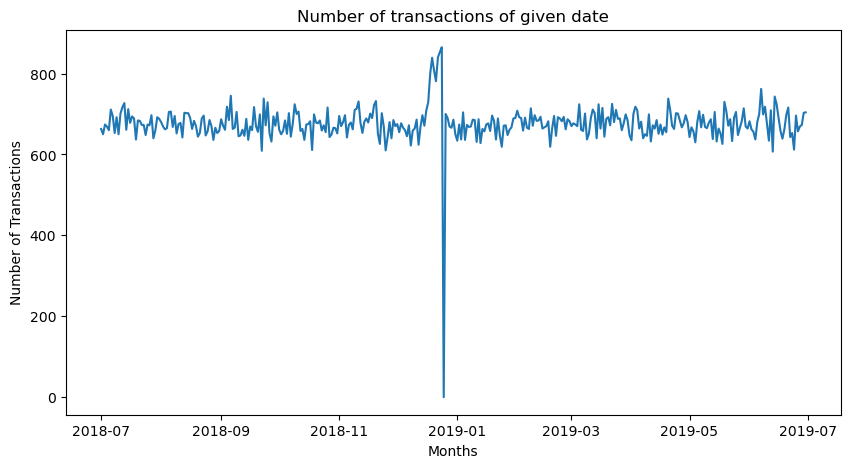

In [35]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(date_count.index, date_count['COUNT'])
plt.title("Number of transactions of given date")
plt.xlabel("Months")
plt.ylabel("Number of Transactions")

plt.show()
#Grpah show sales spkied in December

C:\Users\Dell\AppData\Local\Temp\ipykernel_4932\768273238.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=dec.index, rotation=45, ha='right')


<AxesSubplot:ylabel='COUNT'>

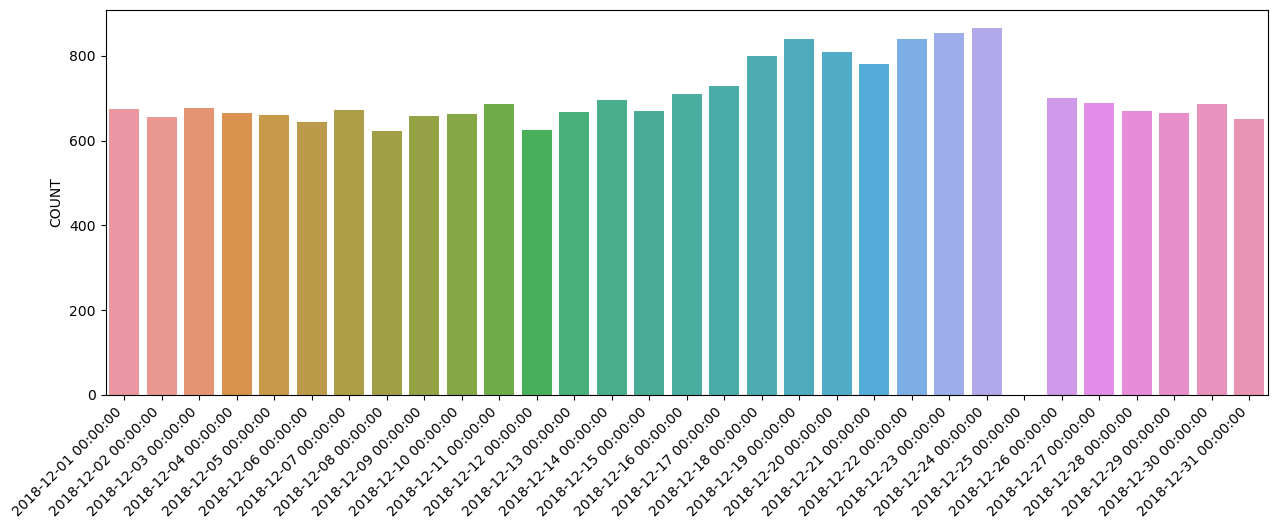

In [36]:
#Take look at december month Transactions
dec = date_count.loc[(date_count.index >= pd.to_datetime('2018-12-01')) & (date_count.index <= pd.to_datetime('2018-12-31'))]
fig, ax = plt.subplots(figsize = (15, 5))
ax.set_xticklabels(labels=dec.index, rotation=45, ha='right')
sns.barplot(data = dec, x=dec.index , y='COUNT', ax = ax)

<h3><b>Proudct Size</b></h3>

In [37]:
Trans_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshny Jlpno Chili,3,13.8,150


In [38]:
Trans_df["PROD_SIZE"].unique()
#largest size is 380 and smallest is 70

array([175, 170, 150, 330, 210, 270, 220, 125, 110, 134, 380, 180, 165,
       135, 250, 200, 160, 190,  90,  70], dtype=int64)

<AxesSubplot:>

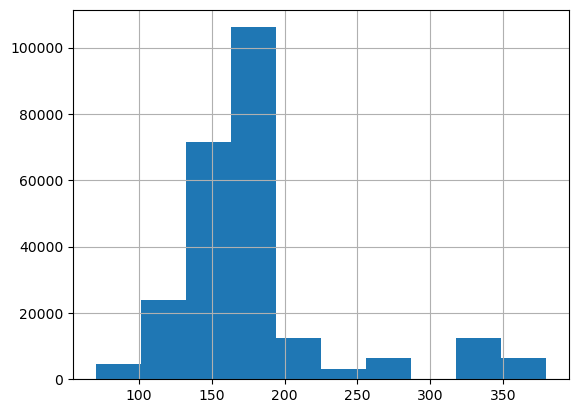

In [39]:
Trans_df["PROD_SIZE"].hist()
#most pack are of size 175, 150

 <h3><b>BRANDS</b></h3>

In [40]:
def getBrand(text):
    return text.split(' ')[0]

Trans_df["BRAND"] = Trans_df["PROD_NAME"].apply(lambda x: getBrand(x))
Trans_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,Ccs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshny Jlpno Chili,3,13.8,150,Kettle


In [41]:
Trans_df["BRAND"].unique()

array(['Natural', 'Ccs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'Ww', 'Thins', 'Burger', 'Ncc', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'Grnwves',
       'Tyrrells', 'Cobs', 'French', 'Rrd', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [42]:
#cleaning brand names
Trans_df["BRAND"].replace('Dorito', "Doritos", inplace=True)
Trans_df["BRAND"].replace('Grnwves', "Grain", inplace=True)
Trans_df["BRAND"].replace('Infzns', "Infuzions", inplace=True)
Trans_df["BRAND"].replace('Ncc', "Natural", inplace=True)
Trans_df["BRAND"].replace(['Red', "Rrd"], 'Red Rock Deli', inplace=True)
Trans_df["BRAND"].replace('Smith', "Smiths", inplace=True)
Trans_df["BRAND"].replace('Snbts', "Subites", inplace=True)
Trans_df["BRAND"].replace('Ww', "Woolworths", inplace=True)

In [43]:
Trans_df["BRAND"].unique()

array(['Natural', 'Ccs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Subites', 'Sunbites'],
      dtype=object)

In [44]:
brand_sales = pd.pivot_table(Trans_df, values='TOT_SALES', index = 'BRAND', aggfunc = 'sum')
brand_sales.sort_values(by = ['TOT_SALES'], ascending =False )

,TOT_SALES
BRAND,
Kettle,390239.8
Doritos,226329.9
Smiths,217486.0
Pringles,177655.5
Infuzions,99047.6
Thins,88852.5
Red Rock Deli,87607.5
Twisties,81522.1
Tostitos,79789.6


C:\Users\Dell\AppData\Local\Temp\ipykernel_4932\2775210894.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=dec.index, rotation=45, ha='right')


<AxesSubplot:xlabel='BRAND', ylabel='TOT_SALES'>

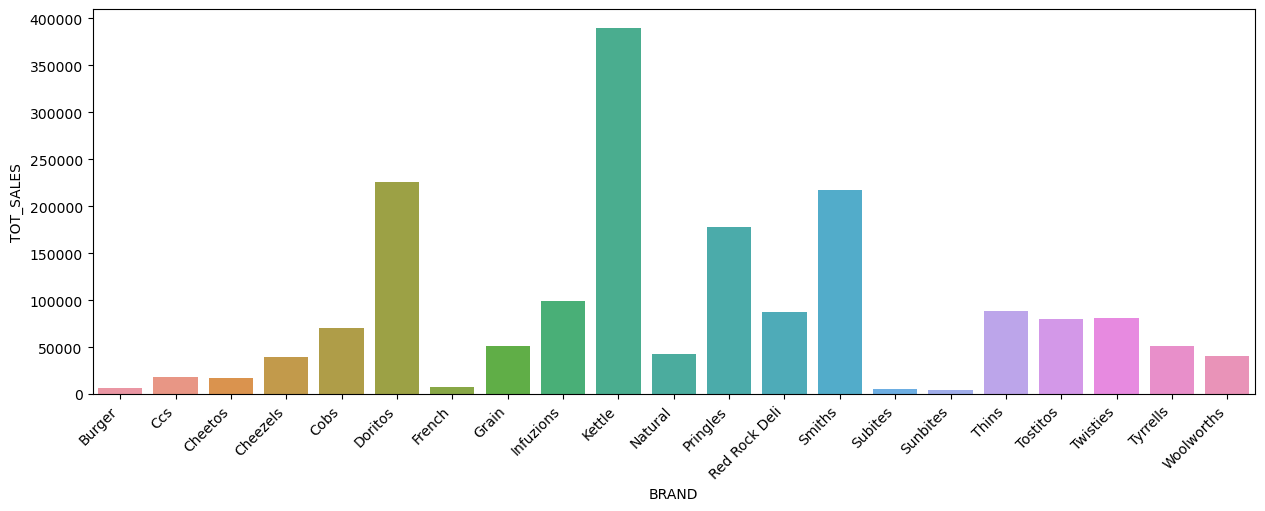

In [45]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.set_xticklabels(labels=dec.index, rotation=45, ha='right')
sns.barplot(data = brand_sales, x=brand_sales.index , y='TOT_SALES')

# Customer Data

In [46]:
#basic exploration
cust_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [47]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72636 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72636 non-null  int64 
 1   LIFESTAGE         72636 non-null  object
 2   PREMIUM_CUSTOMER  72636 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


In [48]:
cust_df.duplicated().sum()
#no duplicates present

0

In [49]:
cust_df.isnull().sum()
# No null values present

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [50]:
print(cust_df["LIFESTAGE"].unique())
cust_df['LIFESTAGE'].nunique()

['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']


7

In [51]:
cust_df["LIFESTAGE"].value_counts().sort_values(ascending = False)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9779
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

<AxesSubplot:xlabel='count', ylabel='LIFESTAGE'>

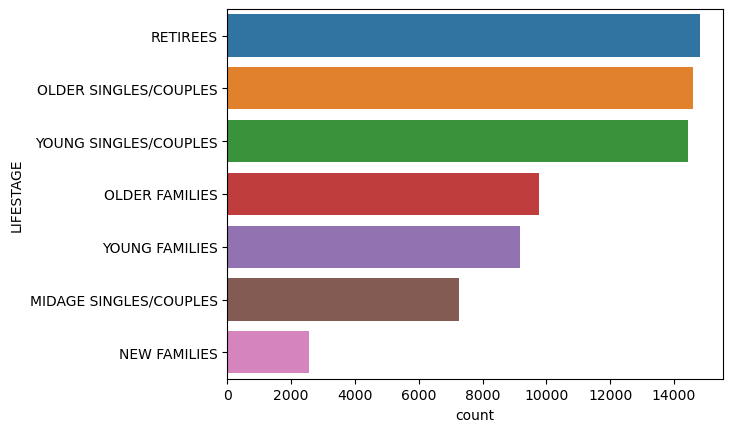

In [52]:
sns.countplot(y = cust_df["LIFESTAGE"], order= cust_df["LIFESTAGE"].value_counts().index)

In [53]:
#For Premium Customers
print(cust_df["PREMIUM_CUSTOMER"].unique())

['Premium' 'Mainstream' 'Budget']


In [54]:
cust_df["PREMIUM_CUSTOMER"].value_counts().sort_values(ascending = False)

Mainstream    29245
Budget        24470
Premium       18921
Name: PREMIUM_CUSTOMER, dtype: int64

<AxesSubplot:xlabel='count', ylabel='PREMIUM_CUSTOMER'>

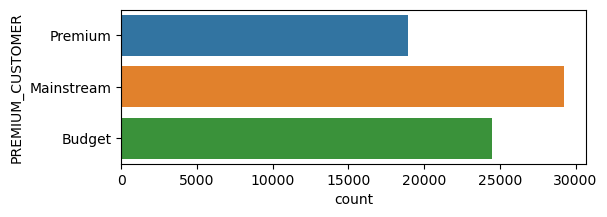

In [55]:
fig, ax = plt.subplots(figsize = (6, 2))
sns.countplot(y = cust_df["PREMIUM_CUSTOMER"])

# Merging both Data Sets

In [56]:
#Joining both datasets
com_df = pd.merge(Trans_df, cust_df, on='LYLTY_CARD_NBR')
com_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,Ccs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,Ww Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,Ccs Original,1,2.1,175,Ccs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [57]:
com_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246739 entries, 0 to 246738
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246739 non-null  datetime64[ns]
 1   STORE_NBR         246739 non-null  int64         
 2   LYLTY_CARD_NBR    246739 non-null  int64         
 3   TXN_ID            246739 non-null  int64         
 4   PROD_NBR          246739 non-null  int64         
 5   PROD_NAME         246739 non-null  object        
 6   PROD_QTY          246739 non-null  int64         
 7   TOT_SALES         246739 non-null  float64       
 8   PROD_SIZE         246739 non-null  int64         
 9   BRAND             246739 non-null  object        
 10  LIFESTAGE         246739 non-null  object        
 11  PREMIUM_CUSTOMER  246739 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.5+ MB


In [58]:
com_df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PROD_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [59]:
com_df.to_csv('QVI_data.csv')

# Analysis

Data analysis on customer segments
Now that the data is ready for analysis, we can define some metrics of interest to
the client:
- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

Let's start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and
plotting the split by these segments to describe which customer segment contribute
most to chip sales.

In [61]:
sales_life =  pd.pivot_table(com_df, values='TOT_SALES', index = 'LIFESTAGE', aggfunc = 'sum')
sales_pre =  pd.pivot_table(com_df, values='TOT_SALES', index = 'PREMIUM_CUSTOMER', aggfunc = 'sum')

In [62]:
sales_life

,TOT_SALES
LIFESTAGE,
MIDAGE SINGLES/COUPLES,172523.80
NEW FAMILIES,47347.95
OLDER FAMILIES,328519.90
OLDER SINGLES/COUPLES,376013.65
RETIREES,342381.90
YOUNG FAMILIES,294627.90
YOUNG SINGLES/COUPLES,243756.60


In [63]:
sales_pre

,TOT_SALES
PREMIUM_CUSTOMER,
Budget,631406.85
Mainstream,700865.40
Premium,472899.45


In [64]:
sales = pd.DataFrame(com_df.groupby(["LIFESTAGE", 'PREMIUM_CUSTOMER'])["TOT_SALES"].sum())
sales

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Budget             33345.70
                       Mainstream         84734.25
                       Premium            54443.85
NEW FAMILIES           Budget             20607.45
                       Mainstream         15979.70
                       Premium            10760.80
OLDER FAMILIES         Budget            156863.75
                       Mainstream         96413.55
                       Premium            75242.60
OLDER SINGLES/COUPLES  Budget            127833.60
                       Mainstream        124648.50
                       Premium           123531.55
RETIREES               Budget            105916.30
                       Mainstream        145168.95
                       Premium            91296.65
YOUNG FAMILIES         Budget            129717.95
                       Mainstream         86338.25
                       Premium            78571.70
YOUNG SINGLES/COUPLES  Budget             57122.10
                       Mainstream        147582.20
                       Premium            39052.30

In [65]:
sales.unstack()

TOT_SALES                      
PREMIUM_CUSTOMER           Budget Mainstream    Premium
LIFESTAGE                                              
MIDAGE SINGLES/COUPLES   33345.70   84734.25   54443.85
NEW FAMILIES             20607.45   15979.70   10760.80
OLDER FAMILIES          156863.75   96413.55   75242.60
OLDER SINGLES/COUPLES   127833.60  124648.50  123531.55
RETIREES                105916.30  145168.95   91296.65
YOUNG FAMILIES          129717.95   86338.25   78571.70
YOUNG SINGLES/COUPLES    57122.10  147582.20   39052.30

<AxesSubplot:title={'center':'Total Sales by customers'}, xlabel='LIFESTAGE'>

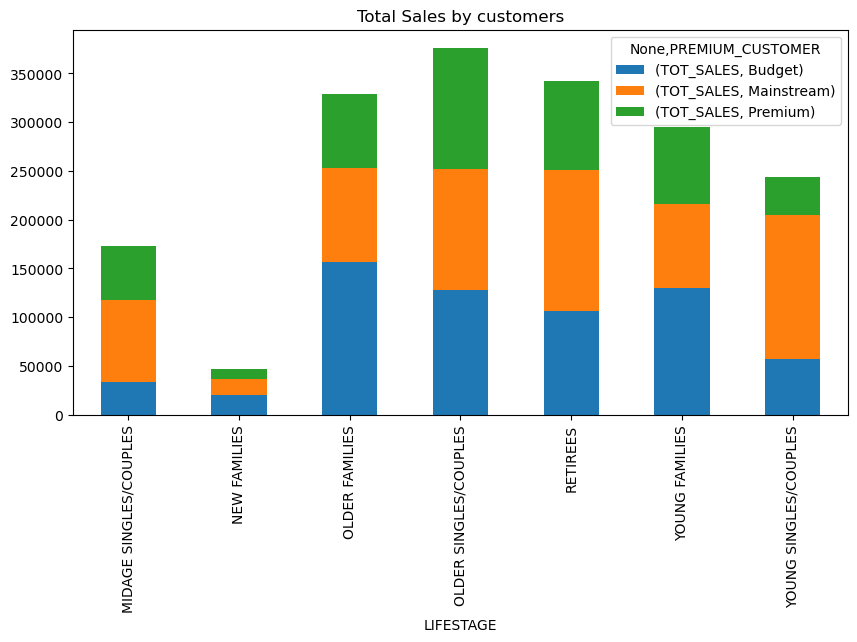

In [66]:
sales.unstack().plot(kind = 'bar', stacked= True, title="Total Sales by customers", figsize = (10,5))

Sales are coming mainly from Budget - older families, Mainstream - young
singles/couples, and Mainstream - retirees


In [67]:
#Let's see if the higher sales are due to there being more customers who buy chips.
#Find number of customers by LIFESTAGE and PREMIUM_CUSTOMER

customers = pd.DataFrame(com_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()) #unique for getting distinct customers
customers.rename(columns = {'LYLTY_CARD_NBR' : 'no_of_customers'}, inplace =True)
customers

no_of_customers
LIFESTAGE              PREMIUM_CUSTOMER                 
MIDAGE SINGLES/COUPLES Budget                       1474
                       Mainstream                   3298
                       Premium                      2369
NEW FAMILIES           Budget                       1087
                       Mainstream                    830
                       Premium                       575
OLDER FAMILIES         Budget                       4611
                       Mainstream                   2788
                       Premium                      2231
OLDER SINGLES/COUPLES  Budget                       4849
                       Mainstream                   4858
                       Premium                      4682
RETIREES               Budget                       4385
                       Mainstream                   6358
                       Premium                      3812
YOUNG FAMILIES         Budget                       3953
                       Mainstream                   2685
                       Premium                      2398
YOUNG SINGLES/COUPLES  Budget                       3647
                       Mainstream                   7917
                       Premium                      2480

<AxesSubplot:title={'center':'Number of Customers by Lifestages and Premium'}, xlabel='LIFESTAGE'>

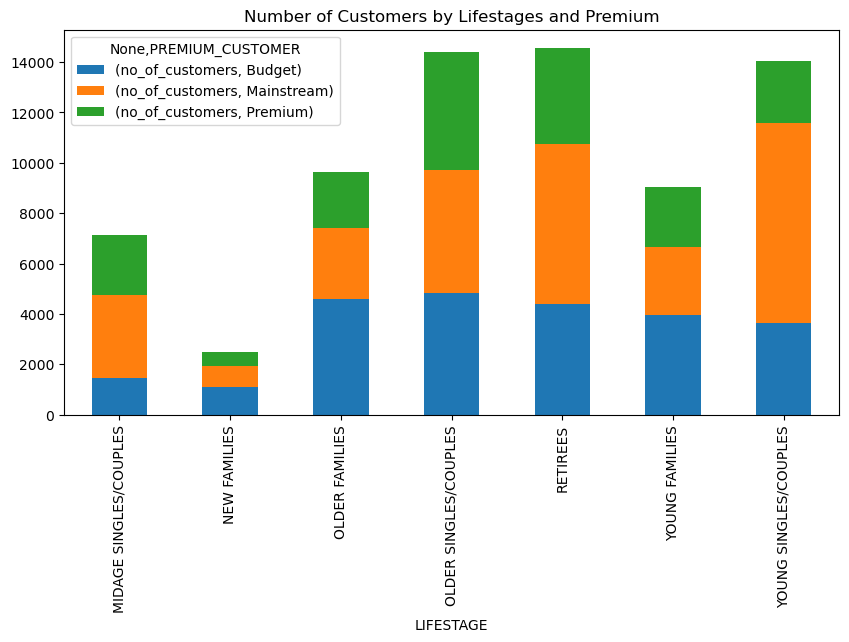

In [68]:
customers.unstack().plot(kind = 'bar', stacked= True, title="Number of Customers by Lifestages and Premium", figsize = (10,5))

There are more Mainstream - young singles/couples and Mainstream - retirees who buy
chips. This contributes to there being more sales to these customer segments but
this is not a major driver for the Budget - Older families segment.


In [69]:
com_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,Ccs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,Ww Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,Ccs Original,1,2.1,175,Ccs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [70]:
#Higher sales may also be driven by more units of chips being bought per customer.
#Let's have a look at this next.
#Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg = pd.DataFrame(com_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum() / com_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique() , columns = {'Average Units per Customers'})


In [71]:
avg.sort_values(by='Average Units per Customers', ascending=False).head()

Average Units per Customers
LIFESTAGE      PREMIUM_CUSTOMER                             
OLDER FAMILIES Mainstream                           9.255380
               Budget                               9.076773
               Premium                              9.071717
YOUNG FAMILIES Budget                               8.722995
               Premium                              8.716013

<AxesSubplot:title={'center':'Average Unit per Customers'}, xlabel='LIFESTAGE'>

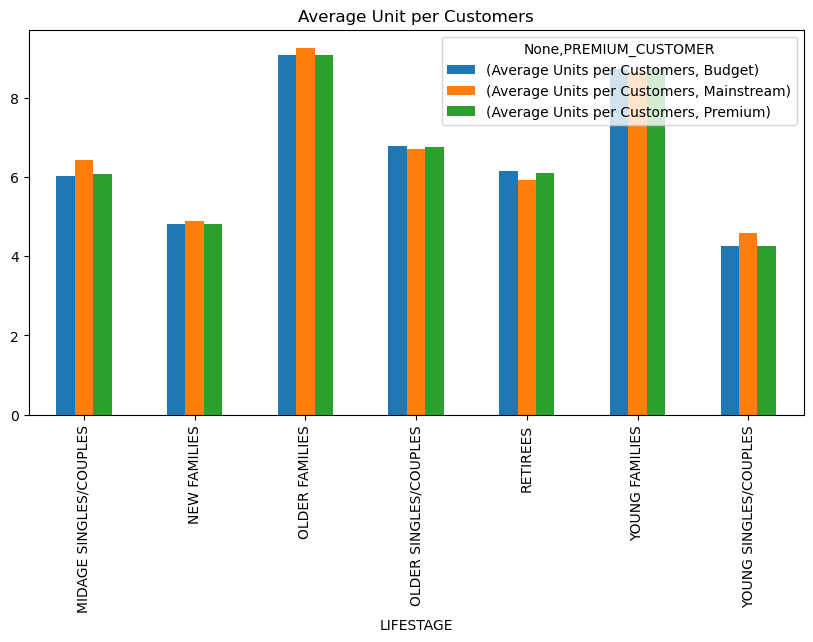

In [72]:
avg.unstack().plot(kind='bar', title= "Average Unit per Customers", figsize= (10,5))

 Older families and young families in general buy more chips per customer


Let's also investigate the average price per unit chips bought for each customer
segment as this is also a driver of total sales.

In [73]:
#Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price = pd.DataFrame(com_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum() / com_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum(), columns= {'Price per unit'})

In [74]:
avg_price

Price per unit
LIFESTAGE              PREMIUM_CUSTOMER                
MIDAGE SINGLES/COUPLES Budget                  3.753878
                       Mainstream              3.994449
                       Premium                 3.780823
NEW FAMILIES           Budget                  3.931969
                       Mainstream              3.935887
                       Premium                 3.886168
OLDER FAMILIES         Budget                  3.747969
                       Mainstream              3.736380
                       Premium                 3.717703
OLDER SINGLES/COUPLES  Budget                  3.887529
                       Mainstream              3.822753
                       Premium                 3.897755
RETIREES               Budget                  3.932731
                       Mainstream              3.852986
                       Premium                 3.924037
YOUNG FAMILIES         Budget                  3.761903
                       Mainstream              3.722439
                       Premium                 3.759232
YOUNG SINGLES/COUPLES  Budget                  3.685297
                       Mainstream              4.074043
                       Premium                 3.692889

<AxesSubplot:title={'center':'Average Price per Customers'}, xlabel='LIFESTAGE'>

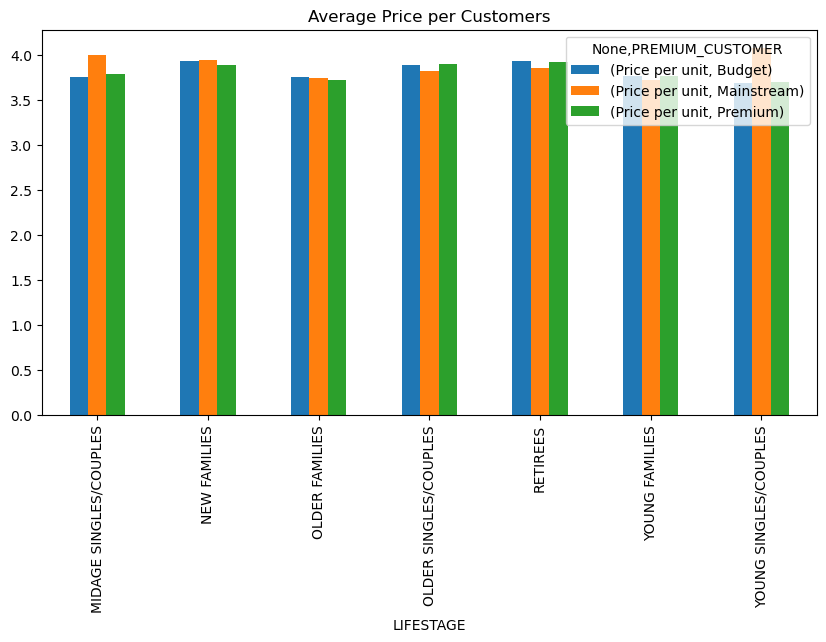

In [75]:
avg_price.unstack().plot(kind='bar', title= "Average Price per Customers", figsize= (10,5))

Mainstream midage and young singles and couples are more willing to pay more per
packet of chips compared to their budget and premium counterparts. This may be due
to premium shoppers being more likely to buy healthy snacks and when they buy
chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and
couples buying chips compared to their mainstream counterparts.

As the difference in average price per unit isn't large, we can check if this difference is statistically different.

In [76]:
#Creating Price column
com_df["PRICE"] = com_df['TOT_SALES'] / com_df['PROD_QTY']

In [81]:
#Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples
from scipy.stats import ttest_ind
mainstream = com_df.loc[(com_df['PREMIUM_CUSTOMER'] == 'Mainstream') & ( (com_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (com_df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']
nonMainstream = com_df.loc[(com_df['PREMIUM_CUSTOMER'] != 'Mainstream') & ( (com_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (com_df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']

print([np.mean(mainstream), np.mean(nonMainstream)])
s,p = ttest_ind(mainstream,nonMainstream)

[4.039785893795137, 3.706491319963857]


In [82]:
if p <0.05:
    print('''the unit price for mainstream, young and mid-age singles and couples ARE significantly higher than
that of budget or premium, young and midage singles and couples''')
else:
    print('''the unit price for mainstream, young and mid-age singles and couples ARE NOT significantly higher than
that of budget or premium, young and midage singles and couples''')
    

the unit price for mainstream, young and mid-age singles and couples ARE significantly higher than
that of budget or premium, young and midage singles and couples


## Deep dive into specific customer segments for insights

We might want to target customer segments that contribute the most to sales to
retain them or further increase sales. Let's look at Mainstream - young
singles/couples. For instance, let's find out if they tend to buy a particular
brand of chips.


In [83]:
target = com_df.loc[(com_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (com_df['PREMIUM_CUSTOMER'] == 'Mainstream')]
nonTarget = com_df.loc[(com_df['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES' ) & (com_df['PREMIUM_CUSTOMER'] != 'Mainstream')]
target.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
221344,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag Sauce,1,2.6,150,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
221345,2018-10-02,1,1020,27,7,Smiths Crinkle Original,1,5.7,330,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.7
221346,2019-05-02,1,1020,28,84,Grnwves Plus Btroot Chilli Jam,1,3.1,180,Grain,YOUNG SINGLES/COUPLES,Mainstream,3.1
221347,2018-08-17,1,1163,188,46,Kettle Original,1,5.4,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
221348,2019-02-07,1,1163,189,12,Natural Chip Co Tmato Hrb Spce,1,3.0,175,Natural,YOUNG SINGLES/COUPLES,Mainstream,3.0


In [84]:
nonTarget.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,Ccs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2018-11-10,1,1307,346,96,Ww Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget,1.90
3,2019-03-09,1,1307,347,54,Ccs Original,1,2.1,175,Ccs,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
5,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00


## Affinity to Brands

In [85]:
# Target Segment
targetBrand = target.loc[:, ['BRAND', 'PROD_QTY']]
targetSum = targetBrand['PROD_QTY'].sum()
targetBrand['Target Brand Affinity'] = targetBrand['PROD_QTY'] / targetSum
targetBrand = pd.DataFrame(targetBrand.groupby('BRAND')['Target Brand Affinity'].sum())

# Non-target segment
nonTargetBrand = nonTarget.loc[:, ['BRAND', 'PROD_QTY']]
nonTargetSum = nonTargetBrand['PROD_QTY'].sum()
nonTargetBrand['Non-Target Brand Affinity'] = nonTargetBrand['PROD_QTY'] / nonTargetSum
nonTargetBrand = pd.DataFrame(nonTargetBrand.groupby('BRAND')['Non-Target Brand Affinity'].sum())


In [86]:
brand_proportions = pd.merge(targetBrand, nonTargetBrand, left_index = True, right_index = True)
brand_proportions.head()

,Target Brand Affinity,Non-Target Brand Affinity
BRAND,,
Burger,0.002926,0.006538
Ccs,0.011180,0.018445
Cheetos,0.008033,0.011759
Cheezels,0.017971,0.018904
Cobs,0.044638,0.038449


In [87]:
brand_proportions['Affinity to Brand'] = brand_proportions['Target Brand Affinity'] / brand_proportions['Non-Target Brand Affinity']
brand_proportions.sort_values(by = 'Affinity to Brand', ascending = False)

,Target Brand Affinity,Non-Target Brand Affinity,Affinity to Brand
BRAND,,,
Tyrrells,0.031553,0.025715,1.227016
Twisties,0.046184,0.037933,1.217496
Doritos,0.122761,0.101172,1.213388
Kettle,0.197985,0.166562,1.188658
Tostitos,0.045411,0.038351,1.184091
Pringles,0.119420,0.101111,1.181081
Cobs,0.044638,0.038449,1.160950
Infuzions,0.064679,0.057410,1.126613
Thins,0.060373,0.057160,1.056209


Mainstream young singles/couples are more likely to purchase Tyrrells chips compared to other brands.

## Affinity to Proudct Size

In [88]:
# Target segment 
targetSize = target.loc[:, ['PROD_SIZE', 'PROD_QTY']]
targetSum = targetSize['PROD_QTY'].sum()
targetSize['Target Pack Affinity'] = targetSize['PROD_QTY'] / targetSum
targetSize = pd.DataFrame(targetSize.groupby('PROD_SIZE')['Target Pack Affinity'].sum())

# Non-target segment
nonTargetSize = nonTarget.loc[:, ['PROD_SIZE', 'PROD_QTY']]
nonTargetSum = nonTargetSize['PROD_QTY'].sum()
nonTargetSize['Non-Target Pack Affinity'] = nonTargetSize['PROD_QTY'] / nonTargetSum
nonTargetSize = pd.DataFrame(nonTargetSize.groupby('PROD_SIZE')['Non-Target Pack Affinity'].sum())

# Merge the two dataframes together

pack_proportions = pd.merge(targetSize, nonTargetSize, left_index = True, right_index = True)
pack_proportions.head()

,Target Pack Affinity,Non-Target Pack Affinity
PROD_SIZE,,
70,0.003037,0.006284
90,0.006349,0.012613
110,0.106280,0.089576
125,0.003009,0.005976
134,0.119420,0.101111


In [89]:
pack_proportions['Affinity to Pack'] = pack_proportions['Target Pack Affinity'] / pack_proportions['Non-Target Pack Affinity']
pack_proportions.sort_values(by = 'Affinity to Pack', ascending = False)

,Target Pack Affinity,Non-Target Pack Affinity,Affinity to Pack
PROD_SIZE,,,
270,0.031829,0.025070,1.269599
380,0.032160,0.025711,1.250818
330,0.061284,0.050975,1.202234
110,0.106280,0.089576,1.186483
134,0.119420,0.101111,1.181081
210,0.029124,0.024892,1.170011
135,0.014769,0.012932,1.142078
250,0.014355,0.012863,1.115951
170,0.080773,0.080348,1.005292


It looks like mainstream singles/couples are more likely to purchase a 270g pack size compared to other pack sizes.



In [90]:
# Which brand offers 270g pack size?

com_df.loc[com_df['PROD_SIZE'] == 270]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
34,2019-05-18,9,9208,8634,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
79,2018-08-24,39,39167,35639,113,Twisties Chicken,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
125,2019-05-06,54,54305,48304,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
132,2019-05-20,55,55073,48887,113,Twisties Chicken,1,4.6,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
209,2019-01-01,80,80182,78980,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246487,2018-07-27,259,259034,257623,113,Twisties Chicken,2,9.2,270,Twisties,YOUNG SINGLES/COUPLES,Premium,4.6
246520,2018-10-13,261,261110,260183,15,Twisties Cheese,2,9.2,270,Twisties,YOUNG SINGLES/COUPLES,Premium,4.6
246632,2019-04-04,266,266095,263934,113,Twisties Chicken,1,4.6,270,Twisties,YOUNG SINGLES/COUPLES,Premium,4.6
246654,2019-03-29,266,266420,264256,15,Twisties Cheese,2,9.2,270,Twisties,YOUNG SINGLES/COUPLES,Premium,4.6


In [91]:
# Is Twisties the only brand who sells 270g pack size?

com_df.loc[com_df['PROD_SIZE'] == 270, 'BRAND'].unique()

array(['Twisties'], dtype=object)

Twisties is the only brand that offers 270g pack size.

# CONCLUSION

* Sales are highest for Budget-OLDER FAMILIES, Mainstream-YOUNG SINGLES/COUPLES and Mainstream-RETIREES
* We found that Mainstream-YOUNG SINGLES/COUPLES and Mainstream-RETIREES are mainly due to the fact that there are more customers in these segments
* Mainstream-YOUNG SINGLES/COUPLES are more likely to pay more per packet of chips than their premium and budget counterparts
* They are also more likely to purchase 'Tyrrells' and '270g' pack sizes than the rest of the population